In [66]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### Data Processing

In [67]:
df= pd.read_csv('data.csv')
df.head()

,url,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,https://www.netflix.com/title/60000724,Forrest Gump,Movie,"Drama, Romance",1994.0,tt0109830,8.8,2311997.0,"AD, AE, AG, AL, AO, AR, AT, AU, BA, BB, BE, BG..."
1,https://www.netflix.com/title/1154386,The Fifth Element,Movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,516291.0,"AT, CH, DE"
2,https://www.netflix.com/title/60031236,Kill Bill: Vol. 1,Movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1219973.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,https://www.netflix.com/title/70021659,Jarhead,Movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211218.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BE, BG..."
4,https://www.netflix.com/title/1080395,Unforgiven,Movie,"Drama, Western",1992.0,tt0105695,8.2,443163.0,"AU, BA, BE, BG, CZ, HR, HU, MD, ME, MK, NZ, PL..."


In [68]:
df.isnull().sum()

url                   12465
title                   503
type                      0
genres                  131
releaseYear              12
imdbId                  604
imdbAverageRating       636
imdbNumVotes            636
availableCountries        0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14284 entries, 0 to 14283
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 1819 non-null   object 
 1   title               13781 non-null  object 
 2   type                14284 non-null  object 
 3   genres              14153 non-null  object 
 4   releaseYear         14272 non-null  float64
 5   imdbId              13680 non-null  object 
 6   imdbAverageRating   13648 non-null  float64
 7   imdbNumVotes        13648 non-null  float64
 8   availableCountries  14284 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1004.5+ KB


In [70]:
df.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,14272.000000,13648.000000,1.364800e+04
mean,2009.754204,6.529089,4.167379e+04
std,15.783869,1.053577,1.398605e+05
min,1913.000000,1.200000,5.000000e+00
25%,2007.000000,5.900000,4.550000e+02
50%,2015.000000,6.600000,2.237500e+03
75%,2019.000000,7.300000,1.684750e+04
max,2024.000000,9.500000,2.954554e+06


In [71]:
df = df.dropna(subset=['releaseYear'])
df = df[df['releaseYear'] != float('inf')]
df['releaseYear'] = df['releaseYear'].astype(int)

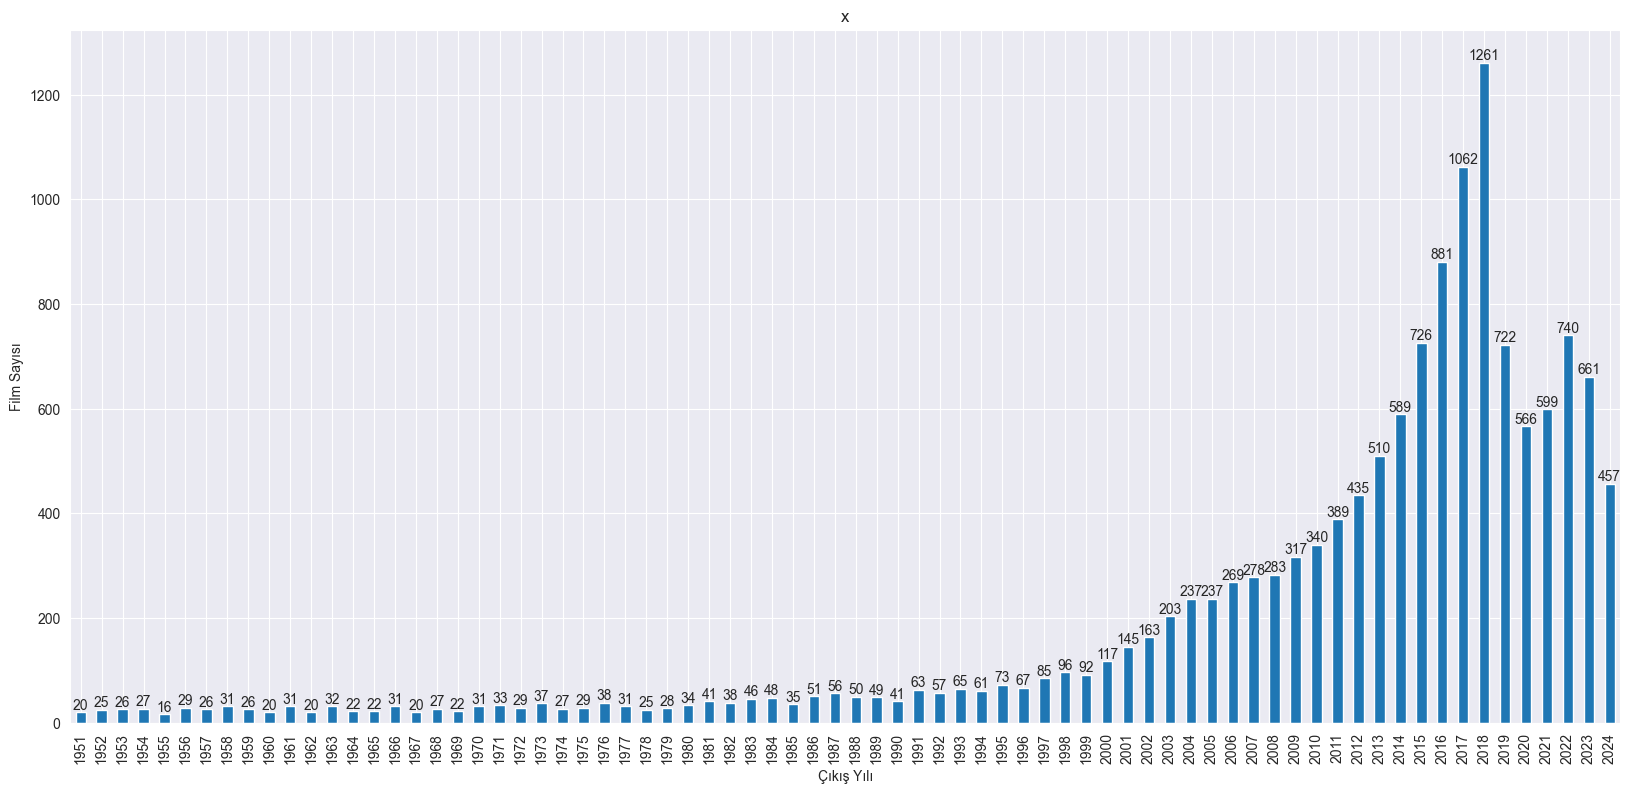

In [72]:
filtered_df = df[df['releaseYear'] > 1950]
ax = filtered_df['releaseYear'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(20, 9))
plt.title('x')
plt.xlabel('Çıkış Yılı')
plt.ylabel('Film Sayısı')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')

plt.show()

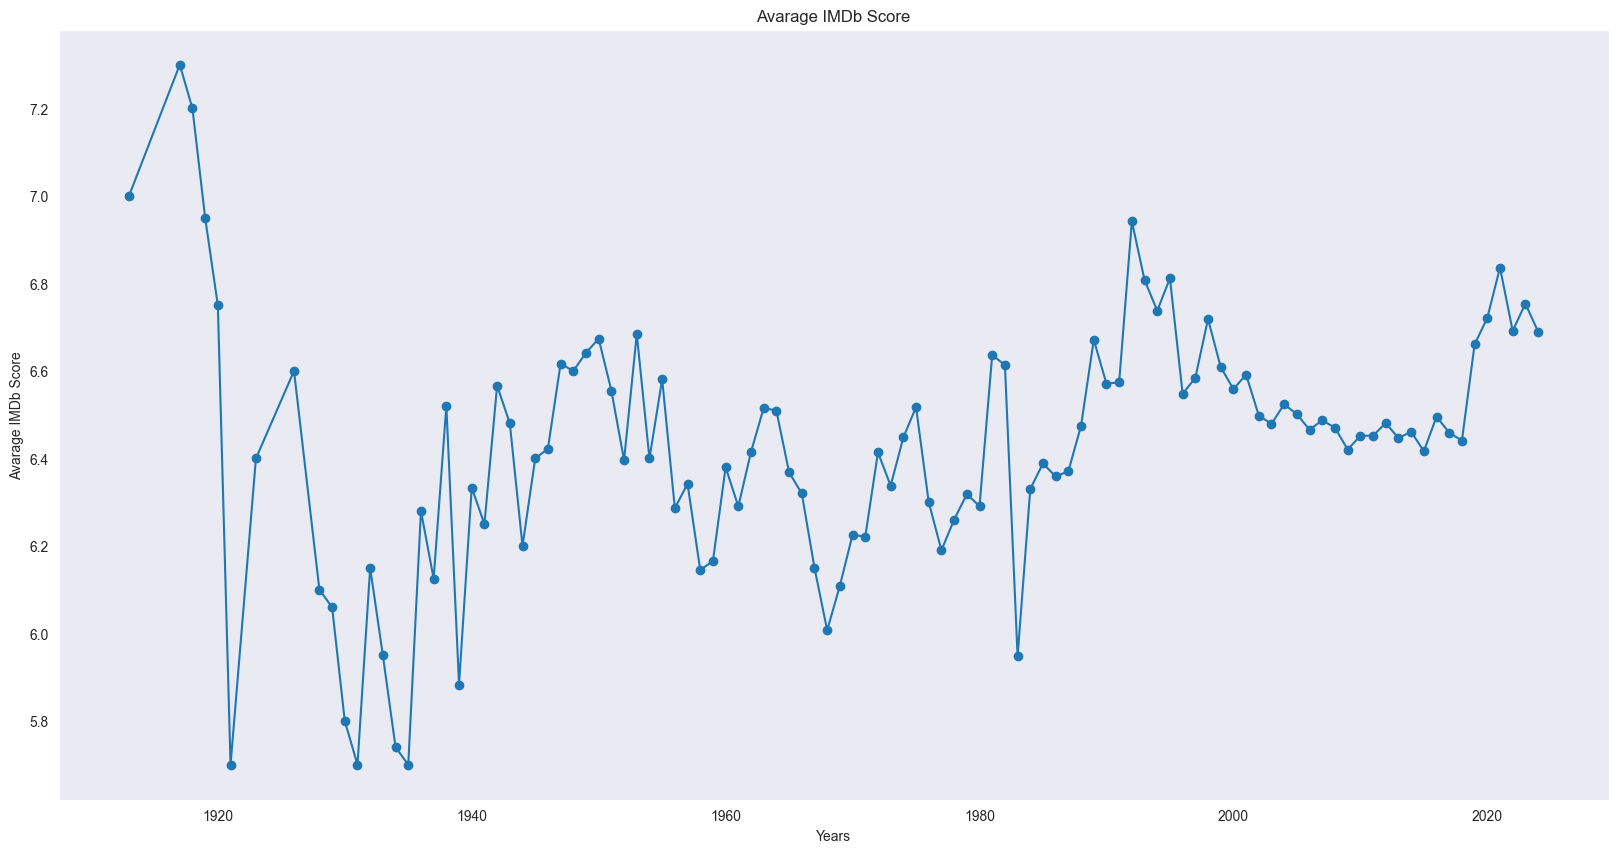

In [73]:
avg_rating_by_year = df.groupby('releaseYear')['imdbAverageRating'].mean()

plt.figure(figsize=(20, 10))
avg_rating_by_year.plot(kind='line', marker='o')
plt.title('Avarage IMDb Score')
plt.xlabel('Years')
plt.ylabel('Avarage IMDb Score')
plt.grid()
plt.show()

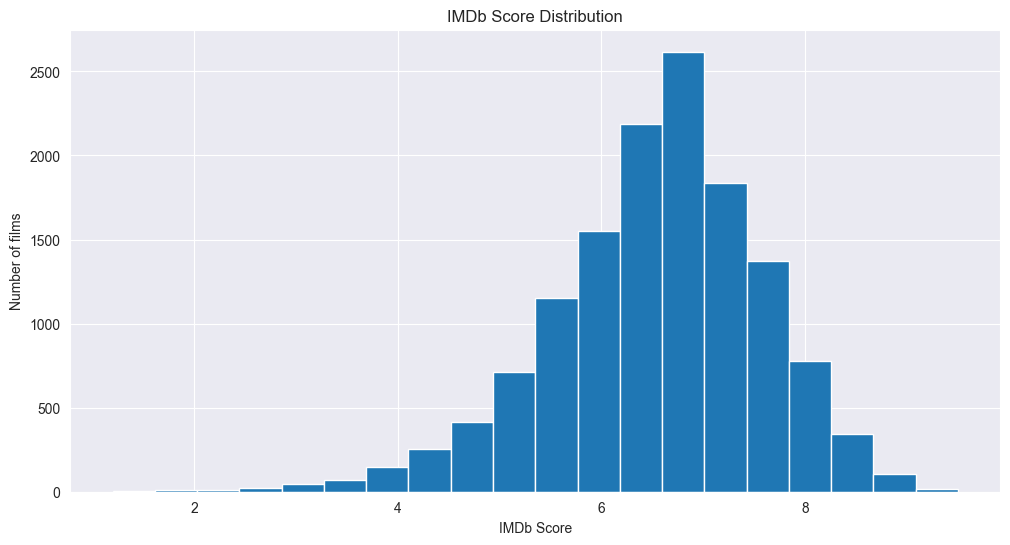

In [74]:
plt.figure(figsize=(12, 6))
plt.hist(df['imdbAverageRating'].dropna(), bins=20)
plt.title('IMDb Score Distribution')
plt.xlabel('IMDb Score')
plt.ylabel('Number of films')
plt.show()


TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

ValueError: Input y contains NaN.